In [1]:
import pandas
import operator
import matplotlib.pyplot as plt
from pylab import *  
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import load_iris
from math import log
%matplotlib inline 

In [2]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)  
    labelCounts = {}  
    for featVec in dataSet:
        currentLabel = featVec[-1]  
        if currentLabel not in labelCounts.keys():  
            labelCounts[currentLabel] = 0;
        labelCounts[currentLabel] += 1;
    shannonEnt = 0.0  
    for key in labelCounts:  
        prob = float(labelCounts[key])/numEntries  
        shannonEnt -= prob * log(prob, 2)
    return shannonEnt;  



def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value : 
            if axis ==0:
                reduceFeatVec = featVec[axis+1:]
            else:
                reduceFeatVec=np.hstack((featVec[:axis],featVec[axis+1:]))
            retDataSet.append(reduceFeatVec)
    return retDataSet  


def chooseBestFeatureToSplit(dataSet):  
    numFeatures = len(dataSet[0])-1 
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1  
    for i in range(numFeatures):  
        featList = [example[i] for example in dataSet]  
        uniqueVals = set(featList)  
        newEntropy = 0.0  
        splitInfo = 0.0;
        for value in uniqueVals:  
            subDataSet = splitDataSet(dataSet, i , value)  
            prob = len(subDataSet)/float(len(dataSet))  
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy  
        print (infoGain)    
        if(infoGain > bestInfoGain):  
            bestInfoGain = infoGain  
            bestFeature = i  
    return bestFeature  

def majorityCnt(classList):  
    classCount = {}  
    for vote in classList:  
        if vote not in classCount.keys(): classCount[vote] = 0  
        classCount[vote] += 1  
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]  


def createTree(dataSet, labels):  
    classList = [example[-1] for example in dataSet];    
    if classList.count(classList[0]) == len(classList):  
        return classList[0];  
    if (len(dataSet[0]) == 1):  
        return majorityCnt(classList);

    bestFeat = chooseBestFeatureToSplit(dataSet);   
    bestFeatLabel = labels[bestFeat]  
    myTree = {bestFeatLabel:{}}    
    featValues = [example[bestFeat] for example in dataSet] 
    uniqueVals = set(featValues)  
    for value in uniqueVals:  
        subLabels = labels  
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)  
    return myTree


mpl.rcParams['font.sans-serif'] = ['SimHei'] 

decisionNode=dict(boxstyle='sawtooth',fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')


def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',
                            xytext=centerPt,textcoords='axes fraction',
                            va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

def createPlot():
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1=plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()


    
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else:numLeafs+=1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else: thisDepth=1
        if thisDepth > maxDepth:
            maxDepth=thisDepth
    return maxDepth



def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2+cntrPt[0]
    yMid=(parentPt[1]-cntrPt[1])/2+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
  

def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.xOff+(1.0+float(numLeafs))/2/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff -1/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1/plotTree.totalD


def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.xOff=-0.5/plotTree.totalW;plotTree.yOff=1.0;
    plotTree(inTree,(0.5,1.0),'')
    plt.show()


def classify(inputTree, featLabels, testVec):  
    firstStr =list( inputTree.keys())[0]  
    secondDict = inputTree[firstStr]  
    featIndex = featLabels.index(firstStr)  
    for key in secondDict.keys():  
        if testVec[featIndex] == key:  
            if type(secondDict[key]).__name__ == 'dict':  
                classLabel = classify(secondDict[key], featLabels, testVec)  
            else: classLabel = secondDict[key]  
    return classLabel  



def predict(tree,labels,X):
    pre = []
    for i in range(len(X)):
        data=X[i]
        y_pre = classify(tree,labels,data)
        pre.append(y_pre)
    return np.array(pre)

def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred) / len(y)

def data_e(dataSet):
    data= dataSet.copy()
    data['sepal length']=data['sepal length']>5.8
    data['sepal width ']=data['sepal width ']>3.0
    data['petal length']=data['petal length']>4.35
    data['petal width']=data['petal width']>1.3
    data.loc[data['sepal length']==True,'sepal length'] = 1.0
    data.loc[data['sepal length']==False,'sepal length'] = 0.0
    data.loc[data['sepal width ']==True,'sepal width '] = 1.0
    data.loc[data['sepal width ']==False,'sepal width '] = 0.0
    data.loc[data['petal length']==True,'petal length'] = 1.0
    data.loc[data['petal length']==False,'petal length'] = 0.0
    data.loc[data['petal width']==True,'petal width'] = 1.0
    data.loc[data['petal width']==False,'petal width'] = 0.0
    return np.array(data)

In [4]:
data_label = load_iris().feature_names
data = pd.read_csv('iris.csv')
split=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train_index,val_index in split.split(data,data['virginica']):
    train_set = data.loc[train_index]
    val_set = data.loc[val_index]

data_train = train_set
y_val = val_set['virginica']
X_val = val_set.drop('virginica',axis=1)

In [5]:
c_data_train = data_e(data_train)
c_y_val = np.array(y_val)
c_X_val = data_e(X_val)

In [6]:
mytree = createTree(c_data_train,data_label)
mytree

0.4831855764509101
0.2758803218576098
0.6695869149314615
0.6745404482721511
0.18882524947947976
0.5982671235394814
0.13030040306483437
0.1022548308345067
0.06940662569774458
0.049066691649155336
0.007475313100607894
0.0013061251559417508
0.07177717800590344
0.0461929125125945
2.289239528385778e-05
0.0017083773579897876


{'petal width (cm)': {0.0: {'sepal width (cm)': {0.0: {'sepal length (cm)': {0.0: {'sepal length (cm)': {0.0: 1.0,
        1.0: 1.0}},
      1.0: 1.0}},
    1.0: 0.0}},
  1.0: {'petal length (cm)': {0.0: 1.0,
    1.0: {'sepal length (cm)': {0.0: 2.0,
      1.0: {'sepal length (cm)': {0.0: 2.0, 1.0: 2.0}}}}}}}}

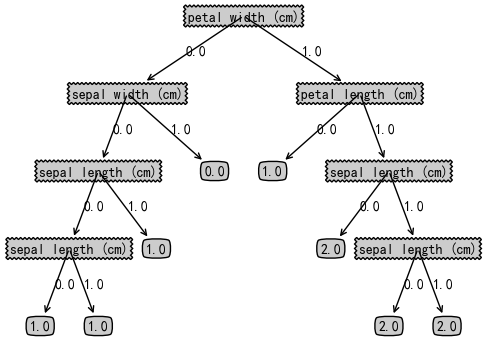

In [7]:
createPlot(mytree)

In [8]:
y_pre = predict(mytree,data_label,c_X_val)
c_acc = accuracy(c_y_val,y_pre)
print ('accuracy = ',c_acc)

accuracy =  0.7631578947368421
